## Import general stuff

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Import fitting

In [9]:
from scipy.optimize import curve_fit
import sys
sys.path.append('/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages')
import lmfit

## Define example function, parameters and "measurement"

In [10]:
# Define function
def gaussian(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x-center)**2 / 2*sigma**2)

# Define parameters
amplitude = 2.33
center    = 0.21
sigma     = 1.51

# Define definition domain
xmin      = -10.
xmax      = 10.
xres      = 100
x         = np.linspace(xmin, xmax, xres)

# Define randomness of "measurement"
rCenter   = 0.
rSigma    = 0.2

# Calculate "measurement"
y         = gaussian(x, amplitude, center, sigma) + np.random.normal(rCenter, rSigma, len(x))

## Fit example with `curve_fit`

[ 2.30891129  0.19048651  1.6122629 ]


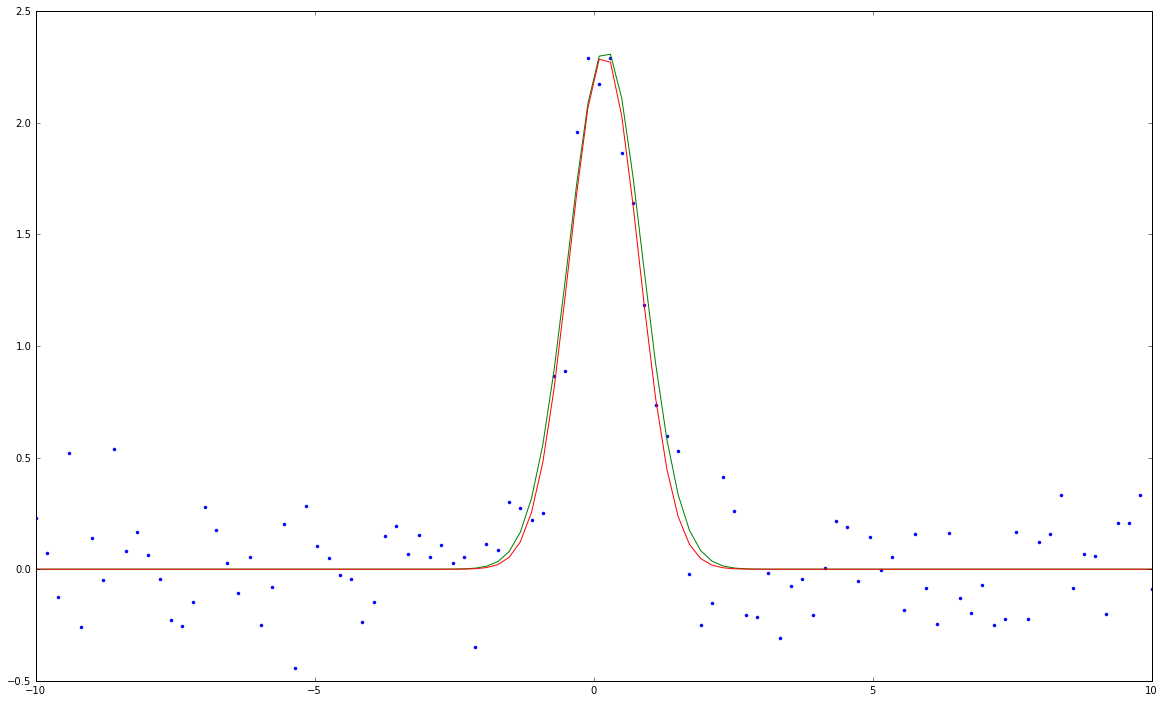

In [11]:
# Set initial values of fit parameters
init_vals = [1., 0., 1.]

# Perform fit
best_vals, covar\
          = curve_fit(gaussian, x, y, p0=init_vals)
print(best_vals)

# Plot
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y, linestyle='', marker='.')
plt.plot(x, gaussian(x, amplitude, center, sigma))
plt.plot(x, gaussian(x, best_vals[0], best_vals[1], best_vals[2]))

## Fit example with `lmfit`

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 100
    # variables        = 3
    chi-square         = 3.803
    reduced chi-square = 0.039
    Akaike info crit   = -320.935
    Bayesian info crit = -313.119
[[Variables]]
    amplitude:   2.30890192 +/- 0.103952 (4.50%) (init= 2)
    center:      0.19048974 +/- 0.032250 (16.93%) (init= 0.2)
    sigma:       1.61224981 +/- 0.083812 (5.20%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, sigma)          =  0.577 



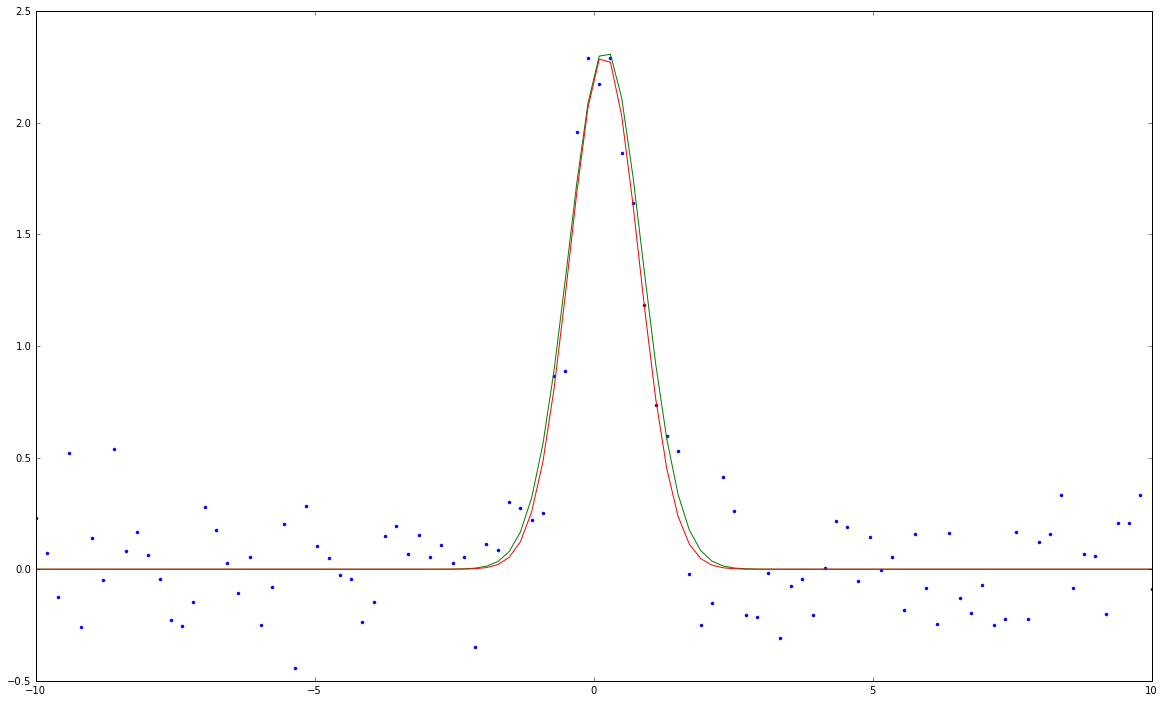

In [17]:
# Wrap the function into a model object
gmod = lmfit.Model(gaussian)

# Set initial values of fit parameters
init_vals = {'amplitude':2, 'center':0.2, 'sigma':1}

# Perform fit
result = gmod.fit(y, x=x, **init_vals)
print(result.fit_report())

# Plot
fig = plt.figure(figsize=(20, 12))
plt.plot(x, y, linestyle='', marker='.')
plt.plot(x, gmod.eval(x=x, amplitude=amplitude, center=center, sigma=sigma))
plt.plot(x, result.best_fit)